In [1]:
# Step-1: import libraries

import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
# Step-2: file path

for dirname,_,filenames in os.walk('/kaggle/input'):
    for file in filenames:
        print(os.path.join(dirname,file))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
#Step-3: Load Dataset

df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Step-4: Preprocessing

df=df[['v1','v2']]
df.columns=['label','text']
# Conver label to numeric
df['label']=df['label'].map({'ham':0,'spam':1}) 

In [5]:
# Step-5: Train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2,random_state=42,stratify=df['label'])



 Trianing with ngram_range=(1, 1)
Accuracy Score: 96.86%
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



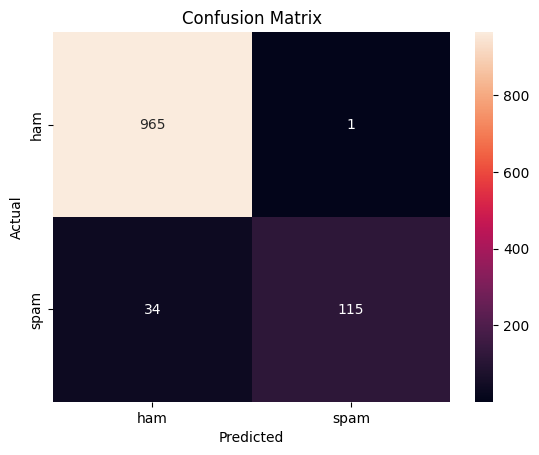


 Trianing with ngram_range=(1, 2)
Accuracy Score: 97.22%
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



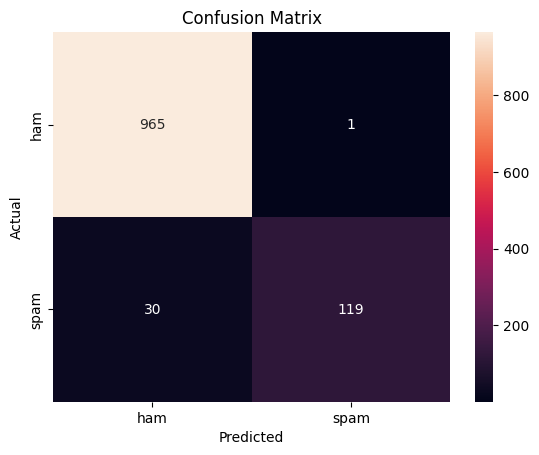


 Trianing with ngram_range=(1, 3)
Accuracy Score: 97.40%
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



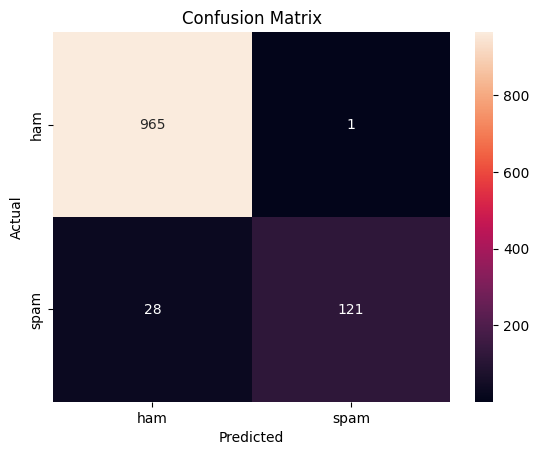

In [6]:
# Step-6: Different n-gram ranges to test

ngram_ranges=[(1,1),(1,2),(1,3)]
results={}

for ngram in ngram_ranges:
    print(f'\n Trianing with ngram_range={ngram}')

    # TF-IDF vectorizer with n-gram
    vectorizer=TfidfVectorizer(stop_words='english',lowercase=True,max_features=5000,ngram_range=ngram)
    x_train_tfidf=vectorizer.fit_transform(x_train)
    x_test_tfidf=vectorizer.transform(x_test)

    # Logistic Regression
    model=LogisticRegression(max_iter=1000)
    model.fit(x_train_tfidf,y_train)
    y_pred=model.predict(x_test_tfidf)

    # model Evaluaion
    acc=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    report=classification_report(y_test,y_pred,target_names=['ham','spam'])

    print(f"Accuracy Score: {acc*100:.2f}%")
    print(f'Classification Report:\n{report}')
    sns.heatmap(cm,annot=True,fmt='d',xticklabels=['ham','spam'],yticklabels=['ham','spam']) 
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    results[ngram]=acc
    

In [8]:
# Step-8: Comparison

print('\n-------------------Accuracy Comparison-------------')
for ngram,acc in results.items():
    print(f'ngram_range={ngram} -> Accuracy= {acc:.4f}')


-------------------Accuracy Comparison-------------
ngram_range=(1, 1) -> Accuracy= 0.9686
ngram_range=(1, 2) -> Accuracy= 0.9722
ngram_range=(1, 3) -> Accuracy= 0.9740
